In [7]:
import sys
sys.version

import exoplanet
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
from astropy import units as u
from astropy.constants import M_earth, M_sun
from simulate import *
from model import *

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)



exoplanet.__version__ = '0.5.1'


/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate.py:352: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate.py:427: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate.py:452: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


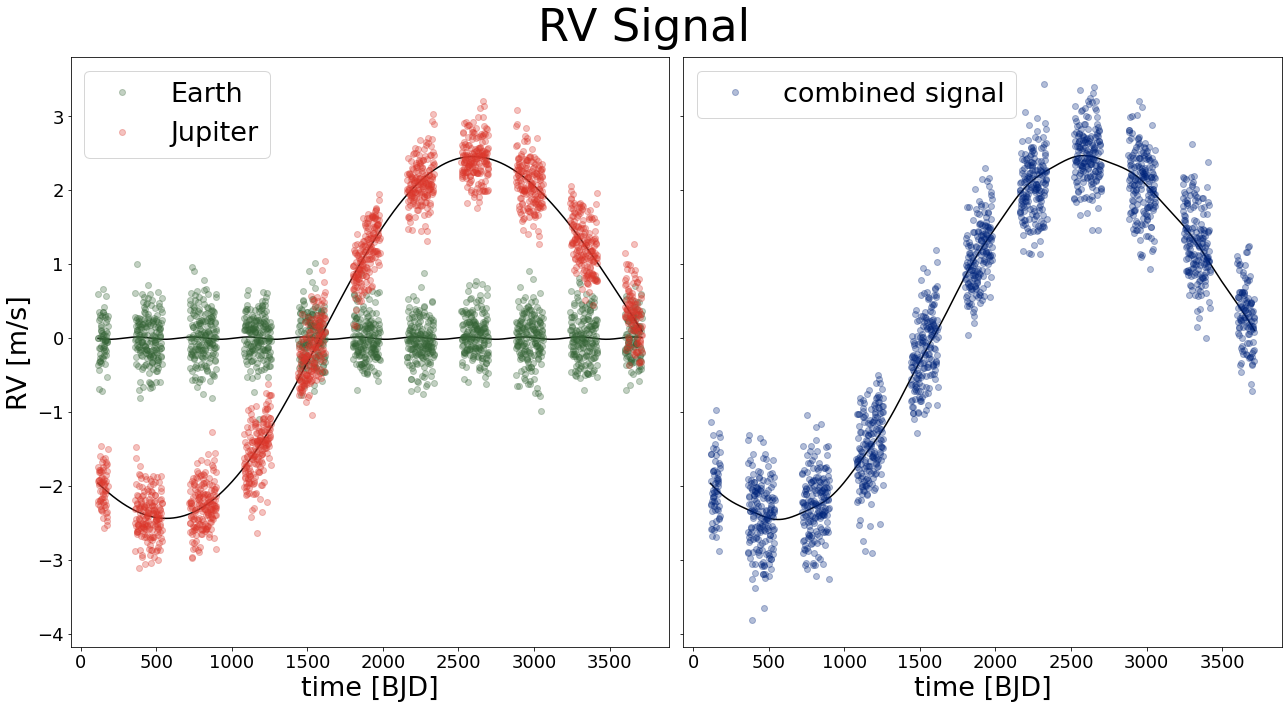

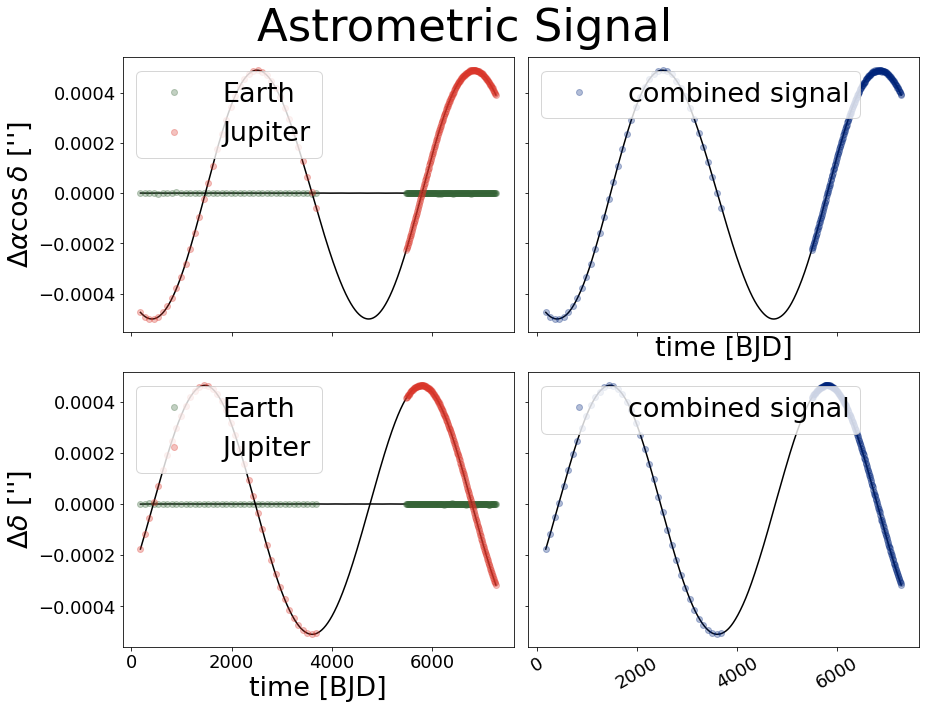

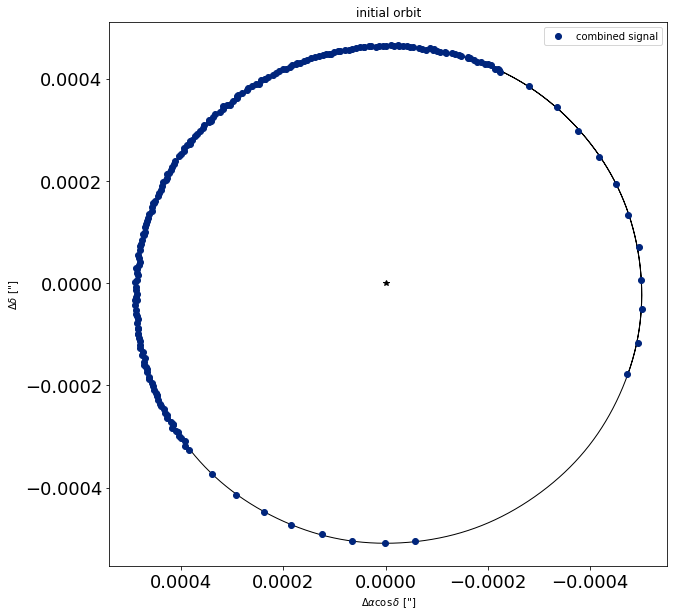

In [8]:
T_subtract = 2454000
# orbital parameters from https://www.princeton.edu/~willman/planetary_systems/Sol/
# BJD determined by converting values above using https://ssd.jpl.nasa.gov/tc.cgi#top

P_earth = 365.256
e_earth = 0.0167
Tper_earth= 2454115.5208333 - T_subtract
omega_earth = np.radians(102.9)
Omega_earth = np.radians(0.0)
inclination_earth = np.radians(10.0)
m_earth = 1*3.00273e-6 #units m_sun



P_jup = 4327.631
e_jup = 0.0484
Tper_jup = 2455633.7215278 - T_subtract
omega_jup = np.radians(274.3) - 2*np.pi
Omega_jup = np.radians(100.4)
inclination_jup = np.radians(1.31) + inclination_earth
m_jup = 317.83*3.00273e-6 #units m_sun


m_sun = 333030 #earth masses


times_observed_astrometry = []
t_0 = int(Tper_earth)
for ii in range(t_0, t_0+3600):
    if ii % 90 == 0:
        times_observed_astrometry.append(ii)

t_1 =  times_observed_astrometry[-1]+1800
for ii in range(t_1, t_1+1800):
    if ii % 10 == 0:
        times_observed_astrometry.append(ii)      
        
times_observed_rv = []
t_0 = int(Tper_earth)
add_data = True
for ii in range(t_0, t_0+3600):
    
    if ii % 180 == 0:
        if add_data:
            add_data = False
        else:
            add_data = True
       
    if add_data:
        times_observed_rv.append(ii)
        

orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

n_planets = 2
orbit_params = [orbit_params_earth, orbit_params_jup]


sigma_rv = 0.3

sigma_ra = 1e-6
sigma_dec = 1e-6
parallax = 0.1



times, rv_results, theta_results, rho_results = simulate_and_plot(
    n_planets, 
    sigma_rv, 
    sigma_ra,
    sigma_dec,
    parallax,
    orbit_params,
    ['#366537', '#db372b', '#00257c'],
    ['Earth', 'Jupiter'],
    times_observed_rv = times_observed_rv,
    times_observed_astrometry = times_observed_astrometry
    )


[[times_rv, times_observed_rv, times_astrometry, times_observed_astrometry],
[rv_orbit, rv_orbit_sum, rv_sim, rv_sim_sum],
[ra_orbit, ra_orbit_sum, ra_sim, ra_sim_sum],
[dec_orbit, dec_orbit_sum, dec_sim, dec_sim_sum]]  = times, rv_results, theta_results, rho_results



In [9]:
x_rv = np.array(times_observed_rv)
y_rv = rv_sim_sum
y_rv_err = np.full(np.shape(y_rv), sigma_rv)

x_astrometry = np.array(times_observed_astrometry)
ra_data = ra_sim_sum
ra_err = np.full(np.shape(ra_data), sigma_ra)
dec_data = dec_sim_sum
dec_err = np.full(np.shape(dec_data), sigma_dec)


# make a fine grid that spans the observation window for plotting purposes
t_astrometry = np.linspace(x_astrometry.min() - 5, x_astrometry.max() + 5, 1000)
t_rv = np.linspace(x_rv.min() - 5, x_rv.max() + 5, 1000)

# for predicted orbits
t_fine = np.linspace(x_astrometry.min() - 500, x_astrometry.max() + 500, num=1000)





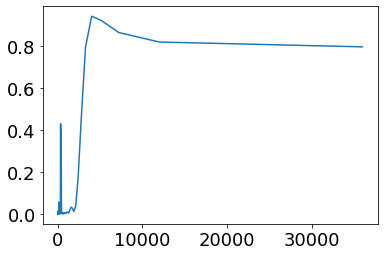

3998.8888888888896
330.18348623853217


In [10]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(x_rv, y_rv).autopower()
period = 1/frequency


period_cut1 = period[period > 10]
power_cut1 = power[period > 10]

plt.plot(period_cut1, power_cut1) 
#plt.xlim(1000,10000)
plt.show()


indices = power_cut1.argsort()[-1:][::-1]
period1 = np.array(period_cut1[indices][0])
print(period1)

period1_min_cut = 2000
#period_cut1 > period1_min_cut so we don't double count

period_cut2 = period_cut1[period_cut1 < period1_min_cut]

power_cut2 = power_cut1[period_cut1 < period1_min_cut]


indices = power_cut2.argsort()[-1:][::-1]
period2 = period_cut2[indices][0]
print(period2)



finding RV model solutions


optimizing logp for variables: [tperi]


message: Optimization terminated successfully.
logp: -44383.46745448723 -> -607.4899195402745
optimizing logp for variables: [logP]


message: Optimization terminated successfully.
logp: -607.4899195402745 -> -542.9425934059273
optimizing logp for variables: [ecs]


message: Desired error not necessarily achieved due to precision loss.
logp: -542.9425934059273 -> -516.8725341219007
optimizing logp for variables: [logs, ecs, logK, tperi, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -516.8725341219007 -> -506.6312290411063


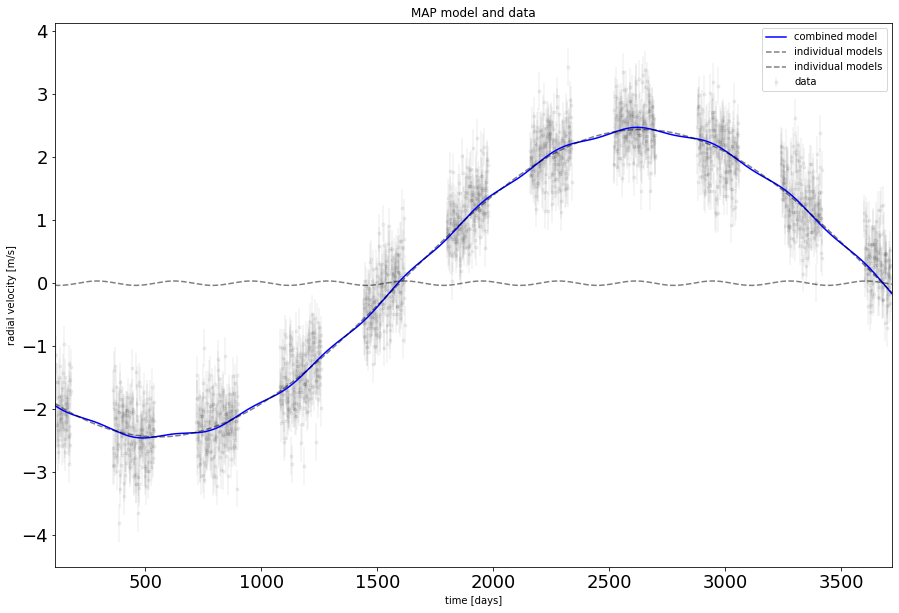

In [11]:

periods_guess = [period2, period1]
#periods_guess = [P_earth, P_jup]

Ks_guess = xo.estimate_semi_amplitude(periods_guess, x_rv, y_rv, y_rv_err)


print("finding RV model solutions")
rv_map_soln = model_rv(periods_guess, Ks_guess, x_rv, y_rv, y_rv_err)

fig, ax = plt.subplots(1, figsize = [15,10])

ax.errorbar(x_rv, y_rv, yerr=y_rv_err, fmt=".k", alpha = 0.05, label='data', zorder=1)
ax.plot(t_rv, rv_map_soln["rv_model_pred"], "b", label="combined model", zorder=2)
ax.plot(t_rv, rv_map_soln["vrad_pred"], "--k", alpha=0.5, label="individual models")


ax.legend(fontsize=10)
ax.set_xlim(t_rv.min(), t_rv.max())
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [m/s]")
ax.set_title("MAP model and data")

plt.show()



In [12]:
print("finding joint model solutions")
parallax = 0.1 # arcsec
model, map_soln = model_both(rv_map_soln, x_rv, y_rv, y_rv_err, x_astrometry, 
                             ra_data, ra_err, dec_data, dec_err, parallax)



finding joint model solutions
RV Solutions
------------
P:  [ 331.71113716 4164.23151271]
K:  [0.03497045 2.44162486]
T_peri:  [1031.67349115 3121.60542714]
eccentricity:  [1.94999683e-17 2.86658909e-14]
omega:  [1.44112186 0.72959112]


optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: NaN result encountered.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [phase, logP]


message: NaN result encountered.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: NaN result encountered.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12708211.41622571 -> -100889.86052416674
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -100889.86052416674 -> -34370.09726044502
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -34370.097260444985 -> -33493.1995030007
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12671634.00795745 -> -139755.73733215782
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -139755.73733215782 -> -74058.58403885977
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -74058.58403885974 -> -14614.561749753957
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12662902.66721685 -> -100889.86052416675
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -100889.86052416675 -> -34373.01398536787
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -34373.013985367885 -> -25408.448319149982
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12658880.189090222 -> -113973.79268663148
/Users/Danielyahalomi/anaconda3/envs/py39/lib/python3.9/site-packages/pymc3/distributions/transforms.py:294: RuntimeWarning: divide by zero encountered in log
  return floatX(np.log(x - a) - np.log(b - x))
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -113973.79268663148 -> -44743.44033961934
/Users/Danielyahalomi/anaconda3/envs/py39/lib/python3.9/site-packages/pymc3/distributions/transforms.py:294: RuntimeWarning: divide by zero encountered in log
  return floatX(np.log(x - a) - np.log(b - x))
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -44743.44033961935 -> -42812.05513511009
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12656353.819306538 -> -100889.86052416678
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -100889.86052416678 -> -34376.02872685086
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -34376.02872685086 -> -26064.00958950675
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12654438.560622437 -> -100889.86052416675
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -100889.86052416675 -> -34384.90822155905
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -34384.90822155907 -> -32845.83751126013
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12652789.51941597 -> -100889.86052416677
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -100889.86052416677 -> -34391.19406587559
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -34391.19406587559 -> -33652.694301593154
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Optimization terminated successfully.
logp: -12651232.701251665 -> -100889.86052416675
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -100889.86052416675 -> -34367.94052366556
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -34367.94052366556 -> -33067.80268401101
optimizing logp for variables: [Omega_plus, Omega_minus, sqrtm_sini_1, sqrtm_cosi_1]


message: Desired error not necessarily achieved due to precision loss.
logp: -12649677.423953742 -> -100910.94531966139
optimizing logp for variables: [phase, logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -100910.94531966139 -> -34352.662352817366
optimizing logp for variables: [log_rv, log_ra_s, log_dec_s, sqrtm_cosi_1, sqrtm_sini_1, phase, Omega_minus, Omega_plus, ecs, logP, m_plx]


message: Desired error not necessarily achieved due to precision loss.
logp: -34352.662352817366 -> -21120.299972080356


In [23]:
print(map_soln[9])

{'m_plx_interval__': array(0.55019035), 'logP_interval__': array([7.07847237, 2.28895417]), 'ecs_unitdisk+interval__': array([[2.32904896e-05, 9.47865729e-05],
       [1.71210531e-04, 8.34124715e-05]]), 'Omega_plus_angle__': array([[ 3.0662084 ],
       [-0.13838205]]), 'Omega_minus_angle__': array([[-1.36960316],
       [ 3.30751661]]), 'phase_angle__': array([[ 2.6927208 , -3.26957069],
       [-3.67599022,  0.61659155]]), 'sqrtm_sini_1_interval__': array([-2.90687259, -3.78491219]), 'sqrtm_cosi_1_interval__': array([-1.95302429, -2.93992966]), 'log_dec_s': array(-13.8155126), 'log_ra_s': array(-13.81551092), 'log_rv': array(-0.90060206), 'm_plx': array(126.83595046), 'plx': array(0.12683595), 'logP': array([9.20258204, 8.36260303]), 'P': array([9922.71688856, 4283.8312027 ]), 'ecs': array([[1.16452448e-05, 4.73932864e-05],
       [8.56052654e-05, 4.17062357e-05]]), 'ecc': array([7.46387319e-09, 3.98553369e-09]), 'omega': array([1.43559204, 0.72165656]), 'Omega_plus': array([1.615897

TypeError: list indices must be integers or slices, not str

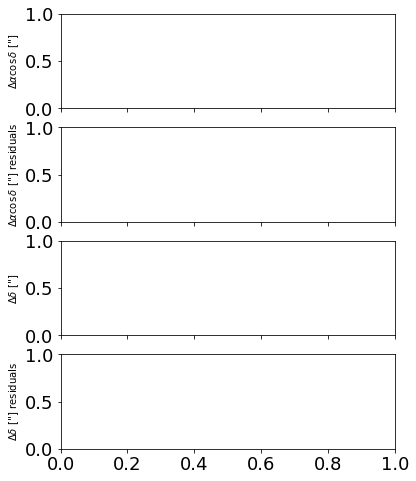

In [13]:
ekw = dict(fmt=".k", lw=0.5)

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(6, 8))
ax[0].set_ylabel(r"$\Delta \alpha \cos \delta$ ['']")
ax[1].set_ylabel(r"$\Delta \alpha \cos \delta$ [''] residuals")
ax[2].set_ylabel(r"$\Delta \delta$ ['']")
ax[3].set_ylabel(r"$\Delta \delta$ [''] residuals")


tot_ra_err = np.sqrt(ra_err ** 2 + np.exp(2 * map_soln["log_ra_s"]))
tot_dec_err = np.sqrt(dec_err ** 2 + np.exp(2 * map_soln["log_dec_s"]))

ax[0].errorbar(x_astrometry, ra_data, yerr=tot_ra_err, **ekw)
ax[0].plot(t_fine, map_soln["ra_model_fine"], color="#773f6a")

ax[1].axhline(0.0, color="0.5")
ax[1].errorbar(
    x_astrometry, ra_data - map_soln["ra_model"], yerr=tot_ra_err, **ekw
)


ax[2].plot(t_fine, map_soln["dec_model_fine"], color="#773f6a")
ax[2].errorbar(x_astrometry, dec_data, yerr=tot_dec_err, **ekw)

ax[3].axhline(0.0, color="0.5")
ax[3].errorbar(
    x_astrometry, dec_data - map_soln["dec_model"], yerr=tot_dec_err, **ekw
)

ax[3].set_xlim(t_fine[0], t_fine[-1])
_ = ax[0].set_title("map orbit")

In [ ]:
fig, ax = plt.subplots(1, figsize = [9,9])
ax.plot(map_soln["ra_model_fine"], map_soln["dec_model_fine"], color="#773f6a", lw=1, label = "RV + astrometry model")


# plot the data
ax.plot(ra_data, dec_data, ".k", label = "data")

ax.set_ylabel(r"$\Delta \delta$ ['']")
ax.set_xlabel(r"$\Delta \alpha \cos \delta$ ['']")
ax.invert_xaxis()
ax.plot(0, 0, "k*")
ax.set_aspect("equal", "datalim")
ax.set_title("initial orbit")
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = [15,10])

ax.errorbar(x_rv, y_rv, yerr=y_rv_err, fmt=".k", alpha = 0.05, label='data', zorder=1)
ax.plot(t_rv, map_soln["rv_model_pred"], "b", label="combined model", zorder=2)
ax.plot(t_rv, map_soln["vrad_pred"], "--k", alpha=0.5, label="individual models")


ax.legend(fontsize=10)
ax.set_xlim(t_rv.min(), t_rv.max())
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [m/s]")
ax.set_title("MAP model and data")

plt.show()

In [ ]:
print(map_soln['m_planet'])
print(map_soln['incl'])
print(map_soln['Omega'])
print(map_soln['tperi'])
print(map_soln['P'])
print(map_soln['ecc'])
print(map_soln['omega'])


In [ ]:
print([m_earth*m_sun, m_jup*m_sun])
print([inclination_earth, inclination_jup])
print([Omega_earth, Omega_jup])
print([Tper_earth, Tper_jup])
print([P_earth, P_jup])
print([e_earth, e_jup])
print([omega_earth, omega_jup])


In [55]:
def get_star_relative_angles(t, parallax):
    
    # determine and print the star position at desired times
    pos = theano.function([], orbit.get_star_position(t, parallax))()


    #pos = tt.sum(pos, axis=-1)

    x,y,z = pos


    # calculate rho and theta
    rho = tt.squeeze(tt.sqrt(x ** 2 + y ** 2))  # arcsec
    theta = tt.squeeze(tt.arctan2(y, x))  # radians between [-pi, pi]
    
    rho, theta = rho.eval(), theta.eval()
    
    return rho, theta


rho, theta = get_star_relative_angles(x_astrometry, parallax)


ra = rho * np.sin(theta)
dec = rho * np.cos(theta)

#ra_single = ra.eval()
#dec_single = dec.eval()

ra_orbit_sum = tt.sum(ra, axis=-1)
dec_orbit_sum = tt.sum(dec, axis=-1)

ra_orbit_sum = ra_orbit_sum.eval()
dec_orbit_sum = dec_orbit_sum.eval()


fig, ax = plt.subplots(2, 1, figsize = (15,15))


ax[0].plot(x_astrometry, ra_orbit_sum, 'o')

ax[1].plot(x_astrometry, dec_orbit_sum, 'o')

NameError: name 'orbit' is not defined